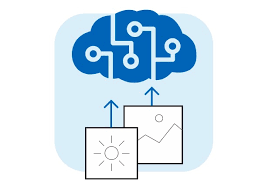

***

# <font color='#0066cc'>Erstellen eines Custom Vision Objekterkennungs Modells</font>

Microsoft bietet mit Custom Vision eine einfache Benutzteroberfläche um ein Maschine Learning Modell zu trainieren, test und bereitzustellen. Dazu stellt Microsoft einige vortrainierte ML-Modelle bereit, die dafür sorgen, dass wir auch schon mit einer geringen Anzahl an bildern ein gutes Ergebnisse erzielt werden kann. In diesem Tutorial soll es zunächst nur um die Erstellung eines Modell und die dazu benötigten Abläufe gehen - Die Modell genauigkeit steht Momentan nicht im Fordergrund. Diese können wir später noch weiter verbessern und einfach in unsere Architektur integrieren.

[Melde dich zunächst in dem Custom Vsion Portal an](https://www.customvision.ai/)

Du kannst auch einen Link zu dem Custom Vision Portal sehen, wenn du in deinem Azure Protal auf die erstellten Custom Vision Ressourcen gehst. Vielleicht ist dir schon aufgefallen, dass du unter deinen Ressourcen zwei Cognetive Services erstellt hast. Der Service ist auf 2 serivces geteilt. Mit der Custom Vision Traing Resource kannst du dein Modell Trainieren und mit der Custom Vision Prediction werden die Modell bereitsgestellt. So hat man die Möglichkeit die Resourcen für das Training und die Resource für die Bereitstellung unabhängig voneinander zu trainieren, da für die Bereitstellung meistens geringere Ressourcen benötigt werden.

Bevor du mit der Erstellung des ML-Modells für unsere Architektur beginnst, erstellt am besten ein Beispiel Projekt und Versuche ein Beispiel Bild hochzuladen und dieses Bild mit einem Rechteck zu labeln. Das Projekt kannst du im anschluss einfach wieder Löschen.
Um Zeit zu sparen werden wir den Schritt für das Hochladen und Makieren (labeln) der Bilder Automatisieren. Dazu nutzen wir die bereitgestellte CSV Dabei und die Python Custm Vision SDK, um die Bilder mit den Rechteckkoordinaten hochzuladen.


Damit wir ein Maschine Learning Modell mit Custom Vision erstellen können müssen wir die folgenden Schritte durchlaufen:

1. Erstellung eines Custm Vision Projektes
2. Wo finde ich die Zugangsschlüssen im Custom Vision Portal?
3. Hochladen der Bild und Recheckdaten mit Python
4. Trainieren des Modells
5. Bereitstellen des Models
6. Testen des Models

Unter den folgenden Links findest du weitere Informationen zu Custom Vision:

- [Was ist Custom Vision?](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/home)
- [Schnellstart: Informationen zum Erstellen einer Objekterkennung mit Custom Vision](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/get-started-build-detector)
- [Schnellstart: Erstellen einer Klassifizierung mit Custom Vision](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/getting-started-build-a-classifier)
- [Testen und erneutes Trainieren eines Modells mit Custom Vision Service](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/test-your-model)
- [Schnellstart: Erstellen eines Bildklassifizierungsprojekts mit dem Custom Vision SDK für .NET](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/csharp-tutorial-od)
- [Schnellstart: Erstellen eines Objekterkennungsprojekts mit dem Custom Vision SDK für Node.js](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/node-tutorial-object-detection)
- [Schnellstart: Erstellen eines Objekterkennungsprojekts mit dem Custom Vision SDK für Python](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/python-tutorial-od)
- [Schnellstart: Erstellen eines Objekterkennungsprojekts mit dem Custom Vision SDK für Java](https://docs.microsoft.com/de-de/azure/cognitive-services/custom-vision-service/java-tutorial-od)


***

## <font color='#0066cc'>Erstellung eines Custom Vision Projektes</font>

[Melde dich zunächst in dem Custom Vsion Portal an](https://www.customvision.ai/)

Erstelle ein Neues Custom Vision Projekt. Geben deinen Namen für das Projekt aus und wähle in den Optionen, dass du eine Objekterkennung erstellen möchtest. Da wir Planen die Modelle auch auf Mobilgräten verwenden möchtest ist es sinnvoll die "General (compact)" Version zu wählen. Diese ist für die Anwendung auf mobilen endgeräten optimiert.

<img src="../media/CustomVisionImages/CustomVisionCreateProject.gif" width="1000">

## <font color='#0066cc'>Wo finde ich die Zugangsschlüssen im Custom Vision Portal? </font>

Um dies Trainingsdaten automatisch mit Python hochzuladen, benötigen wir einige Zugangsschlüssen, damit wir auf unser Projekt und das Custom Vision SDK zugreifen können.

- **Trainings Key** ist der Zugangsschlüssen zu unserer erstellten Azure Custom Vision (Training) Resource
- **Projekt Name** ist name unseres erstellten Projektes
- **Projekt ID** ist die Identifizierungsnummer unseres Erstellten Projektes
- **Endpoint** ist der Link zu deinem Cognetive Service und enthält zusätzlich die die Ortsangabe in der du die Resource deployed hast

Trage in die folgende Code Zeile deine Custom Vision Refferenzen ein und führe die Zelle mit "Run" in der oberen Befehlszeile aus. Das Gif zeigt die wo du die Keys finden kannst.

In [1]:
training_key = " Trage hier deinen Custom Vision Key ein "
project_name = " Trage hier deinen Projektnamen ein "
project_id = "Trage hier deine Projekt ID ein "


training_key = "f27bc63d4a8944e687627072687a73c3"
project_name = "MSBIObjekterkennung"
project_id = "0e5b0e02-d04c-42fd-97ed-a7dadb943e5e"
endpoint = "https://eastus.api.cognitive.microsoft.com/"

<img src="../media/CustomVisionImages/FindKeys.gif" width="1000">

## <font color='#0066cc'> Hochladen der Bild und Recheckdaten mit Python</font>

Nachdem du deine Custom Vision in die obere Code Zeile eingetragen hast und die Zelle ausgeführt hast, kannst du die nächsten beiden Zeilen ausführen. Die Trainingsdaten werden dann automatisch in deinem Custom Vision Projekt hochgeladen und du kannst mit dem Training beginnen.

### Importieren und installieren der benötigten Python Packete

In [2]:
import os
import pandas as pd

try:
    from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
    from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry, Region
except:
    !pip install azure-cognitiveservices-vision-customvision
    from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
    from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry, Region


In [11]:
######## Verbinden zu SDK und Projekt ########

# Verbinden mit der CustomVision Training SDK
trainer = CustomVisionTrainingClient(training_key, endpoint=endpoint)

# Verbinden einem bestehenden Projekt
print ("Connect to project...")
project = trainer.get_project(project_id, custom_headers=None, raw=False)
print(project.id)

try:
    # Erstelle eine neue Bildmarkierung
    tag_str = "NumberArea"
    NumberArea_tag = trainer.create_tag(project.id, tag_str)
except:
    NumberArea_tags = trainer.get_tags(project.id,tag_str)
    for tag in NumberArea_tags:
        if tag.name==tag_str:
            NumberArea_tag = tag 

######## Pfad angaben für Bilder und CSV  ########

# Path andgaben in dem Azure Notebook für die Trainingsdaten und labels
train_images_path = "data/train_images/"
label_path = "data/labels/image_regions.csv"

# erhalte eine list mit alles Bildnamen durch die wir anschließend eine Schleife laufen lassen 
train_file_names = os.listdir(train_images_path)

# lasen der csv datei mit den Rechteckkordinaten und Bildernamen
labels_df = pd.read_csv(label_path)


######## Hochladen der Bilder ########

# Gehe durch alle Bilder namen und lade diese zusammen
# mit den Recheckkordinaten zu Custom Vision

print("Adding images...")

# Bei Custom Vison können nur 64 Bilder auf einmal hochgeladen werden
# Daher müssen wir die Bilder in Batches mit eine größe von 64 Bildern hochladen

# Hilfsfunktion um die Batchen zu erstellen
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

# Nutzen der Batchfunktion um die Bilder in 64er Batches hochzuladen
batch_num = 0
for batch_samples in batch(train_file_names, 64):
    batch_num =+ 1
    print("Starting Batch: " + str(batch_num) + " / " + str(int((len(train_file_names)/64 )+1)))

    tagged_images_with_regions = []

    # Gehe durch alle bildnamen in dem Batch (64 Bilder)
    for file_name in batch_samples:
        
        # wähle aus der CSV Datei die Recheckdaten mit dem Bildnamen (image_id) aus
        row = labels_df[labels_df["image_id"]==file_name]
        
        # Speichere die Koordinaten des Rechecks in variablen
        x,y,w,h =  row["left"],row["top"], row["width"],  row["height"]
        # Speicher den Bildnamen in eine extra variable
        image_id = row["image_id"]

        # Erstellen eine Custom Vision Regionsobjektes
        regions = [Region(tag_id=NumberArea_tag.id, left=x,top=y,width=w,height=h)]

        # kombiniere die Bilder mit den Regionsdaten
        with open(train_images_path + file_name, mode="rb") as image_contents:
            tagged_images_with_regions.append(ImageFileCreateEntry(name=image_id, contents=image_contents.read(), regions=regions))
    
    # Hochladen der erstellen Bild und label kombinationen (64 pro batch)
    upload_result = trainer.create_images_from_files(project.id, images=tagged_images_with_regions)
    
    # Gebe eine Fehlermeldung aus wenn ein Bild nicht hochgeladen werden konnte
    if not upload_result.is_batch_successful:
        for image in upload_result.images:
            print("Image status: ", image.status)


Connect to project...
0e5b0e02-d04c-42fd-97ed-a7dadb943e5e
Adding images...
Starting Batch: 1 / 2


KeyboardInterrupt: 

Wenn das Training Abgeschlossen ist solltest du 90 Bilder in Custom Vision vorfinden und wenn du auf eines der Bilder Klickst solltest du auch den markierten Bereich erkennen können.

***

## <font color='#0066cc'>Trainieren des Modells </font>

Wenn alle Bilder in Custom Vision hochgeladen wurden kannst du mit dem Training des Modells beginnen. Klicke dazu einfach auf Training im oberen Menüband und wähle Quick Training. Durch das Advenced Training können die Ressourcen kosten minimiert werden da man Azure lediglich ein max Trainingszeit mitgiebt und somit Azure überlässt wann das Training ausgeführt werden soll.

Das Training wird einen moment dauern. In dieser Zeit kannst du dich schonmal mit der Bewertung des Modells beschäftigen.

- Die Genauigkeit (Precision) gibt den Anteil der richtig identifizierten Klassifizierungen an. Beispiel: Wenn das Modell 100 Bilder als Hunde identifiziert hat und 99 davon tatsächlich Hunde zeigten, beträgt die Genauigkeit 99 %.

- Die Trefferquote (Recall) gibt den Anteil der tatsächlichen Klassifizierungen an, die richtig identifiziert wurden. Beispiel: Wenn tatsächlich 100 Bilder von Äpfeln vorhanden sind und das Modell 80 davon als Äpfel identifiziert, beträgt die Trefferquote 80 %.


Der Schieberegler für den Wahrscheinlichkeitsschwellenwert im linken Bereich der Registerkarte Leistung ist das Maß an Vertrauen, das eine Vorhersage aufweisen muss, um als richtig betrachtet zu werden (zur Berechnung von Genauigkeit und Trefferquote).

<img src="../media/CustomVisionImages/training.gif" width="1000">

## <font color='#0066cc'>Bereitstellen des Modells </font>

Mit dem bereitstellen unsers Modells veröffentlich wir es auf unsere Custom Vision Prediction Ressource. In dem Portal können wir dazu einfachen unter Performance gehen und im oberen Reiter Puplish wählen. In dem Menü müssen wir dann einen Namen für das Modell festlegen und eine Custom Vision Prediction Ressource auswählen.

<img src="../media/CustomVisionImages/puplish.gif" width="1000">

Unter Prediction URL findest du dann einige Zugangsdaten für die Predictin API. Diese werden wir später für das Implementieren des Modells in eine Logik App verwenden.

## <font color='#0066cc'>Testen des Models </font>

Es gibt mehrere Möglichkeiten um das Modell auf die Test daten Anzuwenden. Zum einen kannst du im Custom Vison Portal die Test Funktion nutzen um schnell einzelne Bilder zu testen oder du nutzt eine der SDk um einen Test auf alle Testdaten auszuführen.

Wenn du das Modell auf alle Testdaten anwenden möchtest kannst du gerne das folgende Python Script dazu verwenden. Für die Vorhersage brauchen wir einige zusätzliche Keys, da wir nun auf die Custom Vision Prediction Ressource zugreifen wollen.

## <font color='#0066cc'>Wo finde ich die Keys für die Vorhersage Ressourcen? </font>

<img src="../media/CustomVisionImages/prediction.gif" width="1000">

### Trage deine Custom Vision Refferenzen in die folgende Code Zeile ein und führe sie aus

In [90]:
prediction_key =  "d4b69c14e9714e549dc360b045ccb54e"

endpoint = "https://eastus.api.cognitive.microsoft.com/"

project_id = "0e5b0e02-d04c-42fd-97ed-a7dadb943e5e"

prediction_resource_id = "/subscriptions/f7256e7b-4859-4bf1-af37-6d8bbf16129f/resourceGroups/MSBI-Hackathlon-2019-2ea64/providers/Microsoft.CognitiveServices/accounts/cvprediction"

publish_iteration_name = "Objekterkennung"

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

try:
    import cv2
    from metrics import IoU
    
except:
    !pip install opencv-python
    import cv2


credentials = {
    "endpoint": endpoint,
    "prediction_key": prediction_key,
    "prediction_resource_id": prediction_resource_id,
    "project_id":project_id,
    "publish_iteration_name": publish_iteration_name
}

#### Helperfunctions #### 

def plot_image_detection(image_name, test_images_path, best_box, gt_box):
    
    '''
    Funktion um die Rückgabe des Modells zu visualisieren
    '''

    img = cv2.imread(test_images_path + image_name)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    img_height, img_width,_ = img.shape
    pixel_box, pixel_box_gt = calculate_pixel_box(best_box,gt_box, test_images_path, image_name)
    
    rect = patches.Rectangle((pixel_box[0], pixel_box[1]), pixel_box[2],pixel_box[3], linewidth=2, label="Detection", edgecolor="r", fill=False)
    rect_gt = patches.Rectangle((pixel_box_gt[0], pixel_box_gt[1]), pixel_box_gt[2],pixel_box_gt[3], linewidth=2, label="Groundtruth", edgecolor="g", fill=False)
    
    ax.add_patch(rect)
    ax.add_patch(rect_gt)
    ax.legend()
    plt.show()
    
def IoU(a, b):  
    
    '''
    Berechnung der Intersection over union zwischen 2 Rechtecken
    '''
    
    # rectangle = [left, top, width, height]
    
    # breite der Schittmenge
    dx = min(a[0] + a[2], b[0] + b[2]) - max(a[0], b[0])

    # Höhe der Schnittmenge
    dy = min(a[1] + a[3], b[1] + b[3]) - max(a[1], b[1])
    
    # Berechnung der Schnittmenge (AnB)
    AnB = dx*dy
    
    # Berechnung der Vereinigungsmenge (AuB)
    vx = b[3] * b[2] 
    vy = a[3] * a[2]
    AuB = vx + vy
    
    if (dx>=0) and (dy>=0):
        # Berechnung der Prozentualen Überlappung
        return AnB / (AuB- AnB)
    else:
        # Gebe 0 zurück wenn die Rechtecke nicht überlappen
        return 0    

def calculate_pixel_box(best_box, gt_box, test_images_path, image_name):
    
    '''
    Function zum Berechnen der Boxkoordinaten in Pixeln
    In der CSV liegen die koordinaten normalisiert (in prozent zur Breite bzw. Höhe des Bildes)
    '''

    img = cv2.imread(test_images_path + image_name)
    img_height, img_width,_ = img.shape

    xmin = best_box[0] * img_width
    ymin = best_box[1] * img_height
    box_width = best_box[2] * img_width
    box_height = best_box[3] * img_height
    pixel_box = [xmin,ymin,box_width,box_height]

    xmin_gt = gt_box[0] * img_width
    ymin_gt = gt_box[1] * img_height
    box_width_gt = gt_box[2] * img_width
    box_height_gt = gt_box[3] * img_height
    pixel_box_gt = [xmin_gt,ymin_gt,box_width_gt,box_height_gt] 

    return pixel_box, pixel_box_gt



### Evaluate Model with Test data ###
    
def evaluation(
    image_name,
    credentials,
    test_images_path="../data/test_images/",
    label_path="../data/labels/image_regions.csv",
    vis=True):
    
    
    '''
    Evaluierungsfunktion des Modells
    
    Beschreibung:
    Es werden die Testbilder verwendet und eine Audgabe von dem Modell bezogen. Diese können dann mit den richtigen Daten auch der CSV Datei
    vergleichen werden. Dazu wird die intersection over union berechnet. Zusätzlich werden die Besten vorhersagen ausgewählt.
    Die Ergebnisse werden dann in dem Notebook visualisiert.
    
    Rückgabe der Funtion:
    
    Es wird ein Dict zurückgegeben das die folgenden Informationen enthält.
    
    
    image_name: Name des Bildes
    image_path: Pfad des bildes 
    probability: Vorhersagegenauigkeit 
    relative_bounding_box: Normalisierte Reckeckkordinaten -> {"left": best_box[0], "top": best_box[1], "box_width": best_box[2], "box_height": best_box[3]},
    pixel_bounding_box: Pixel Reckeckkordinaten -> {"left": pixel_box[0], "top": pixel_box[1], "box_width": pixel_box[2], "box_height": pixel_box[3]},
    aoi_score: Intersection over union Wert
    '''
    
    print("Start Prediction...")

    # Speichern der Refferenzen in variablen
    ENDPOINT = credentials["endpoint"]
    prediction_key = credentials["prediction_key"]
    prediction_resource_id = credentials["prediction_resource_id"]
    project_id = credentials["project_id"]
    #publish_iteration_name = credentials["publish_iteration_name"]


    # Zugriff auf die Prediction APIum Vorhersagen zu beziehen
    predictor = CustomVisionPredictionClient(prediction_key, endpoint=ENDPOINT)

    # Öffnen eines Bildes aus dem Azure Notebook Projekt Pfad und beziehen einer Modell Vorhersage
    with open(test_images_path + image_name, mode="rb") as test_data:
        results = predictor.detect_image(project_id, publish_iteration_name, test_data)

    # Sammeln der Modell Rückgaben   
    select_best_score = [score.probability for score in results.predictions] 
    # Auswahl der besten Vorhersage
    best_prediction = results.predictions[select_best_score.index(max(select_best_score))]
    # Speichern der Reckeckboxen der besten Vorhersage
    best_box = [
        float(best_prediction.bounding_box.left),
        float(best_prediction.bounding_box.top), 
        float(best_prediction.bounding_box.width),
        float(best_prediction.bounding_box.height)]

    # laden der Daten labels aus der csv datei
    labels = pd.read_csv(label_path)
    # Auswahl des richtigen labels über den Bildnamen
    gt = labels[labels["image_id"] == image_name]
    # Speichern des richtigen labels in eine variable
    gt_box = [
        float(gt.left),
        float(gt.top),
        float(gt.width),
        float(gt.height)]
    
    # Berechnung der Pixel Rechteckboxen 
    pixel_box, pixel_box_gt = calculate_pixel_box(best_box,gt_box, test_images_path, image_name)
    
    # Berechnung der Intersection over union
    aoi_score = IoU(pixel_box, pixel_box_gt)
    
    # Ergebnisse können visualisiert werden  
    if vis == True:
        plot_image_detection(image_name, test_images_path, best_box, gt_box)
    
    
    # Erstellung einer sortierten Funktionsrückgeabe
    prediction_result = {
        "image_name": image_name,
        "image_path": test_images_path, 
        "probability":best_prediction.probability,
        "relative_bounding_box": {"left": best_box[0], "top": best_box[1], "box_width": best_box[2], "box_height": best_box[3]},
        "pixel_bounding_box": {"left": pixel_box[0], "top": pixel_box[1], "box_width": pixel_box[2], "box_height": pixel_box[3]},
        "aoi_score": aoi_score
    }

    return prediction_result

# Scheife durch alle Bildernamen in dem Testbilder Ordner 
for img_name in os.listdir("../data/test_images/"):
    
    prediction = evaluation(image_name=img_name, credentials=credentials, vis=True)
    print(prediction)

# <font color='#0066cc'>Nächsten Schritte </font>

Da wir nun das Modell Trainier, Bereitgestellt und getestet haben können wir uns um die Erstellung der LogikApp kümmern. Dort werden wir das jetzige Objekterkennungsmodell und des Seervice für das OCR verfahren anzenden und zusammen führen.

Des Objekterkennungsmodell ist Zwar noch nicht so genau wie wir es für einen Produktiven Einsatz benötigen würde, aber das nachtrainieren und Optimieren des Modells können wir zu einem späteren Zeitpunkt nachholen.